In [223]:
name = "Alex Aaltonen"
id = 2423702

In [224]:
# Select the data file based on your student ID
n = id % 5 # Take the modulo 5 of your student ID
num_list = [3, 4, 6, 8, 9] # List of numbers to select from
filename = f'./data/bidmc_{num_list[n]:02d}_Signals.csv'
print(f'Filename: {filename}')

Filename: ./data/bidmc_06_Signals.csv


In [225]:
# Run if needed
#%pip install numpy pandas matplotlib scipy

In [226]:
# Read necessary libraries and functions
import numpy as np                  # for numerical operations
import matplotlib.pyplot as plt     # for plotting
import pandas as pd                 # for reading data
from scipy.signal import find_peaks # for peak detection
import os                           # for file operations

In [227]:
# Print the list of files in the ./data directory
os.listdir('./data')

['bidmc_02_Fix.txt',
 'bidmc_02_Signals.csv',
 'bidmc_03_Fix.txt',
 'bidmc_03_Signals.csv',
 'bidmc_04_Fix.txt',
 'bidmc_04_Signals.csv',
 'bidmc_06_Fix.txt',
 'bidmc_06_Signals.csv',
 'bidmc_08_Fix.txt',
 'bidmc_08_Signals.csv',
 'bidmc_09_Fix.txt',
 'bidmc_09_Signals.csv']

In [228]:
# Read the data
data = pd.read_csv(filename)

# Get PPG signal and create time vector
ppg = data[' PLETH']
ts = 0.008 # Sample time in seconds
fs = 1/ts # Sample rate (Hz), samples per second
t = np.arange(len(ppg))*ts

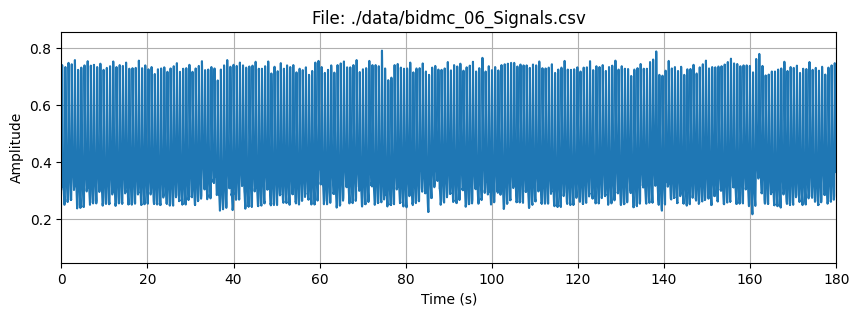

In [229]:
# Plot 180 seconds of the full signal
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 180)
plt.grid()
plt.show()

In [230]:
# Continue coding here ...

In [231]:
# Remember to add your interpretations ...

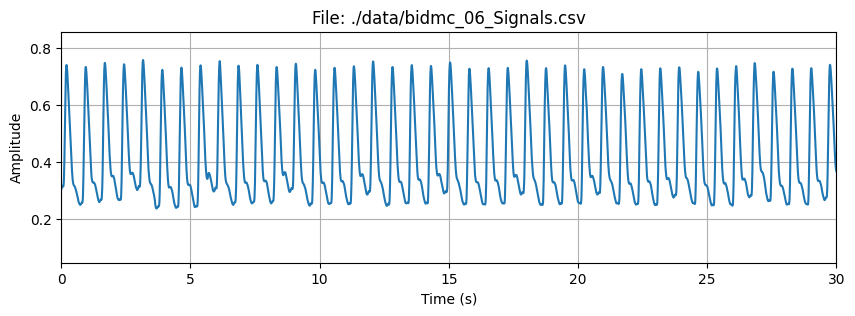

In [232]:
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')
plt.xlim(0, 30) # Zoomaa --> pienempi tarkastelu aika
plt.grid()
plt.show()

In [233]:
#find peakes --> using library, not available for project
peaks, properties = find_peaks(ppg, height=0.5)


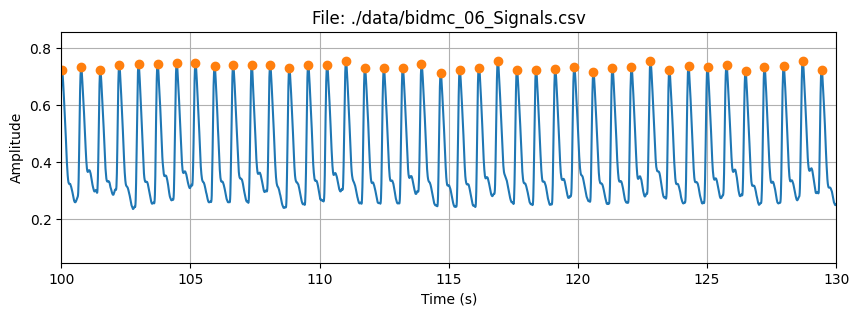

In [234]:
peaks, properties = find_peaks(ppg, height=0.5, distance=50)
# distance is good if you want to discard double spikes --> sets minimun interval
# Plot the ppg signal and the peaks
plt.figure(figsize = (10, 3))
plt.plot(t, ppg)
plt.plot(t[peaks], ppg[peaks], 'o')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.title(f'File: {filename}')

# Zoom in from 100 to 130 seconds
plt.xlim(100, 130) 

plt.grid()
plt.show()

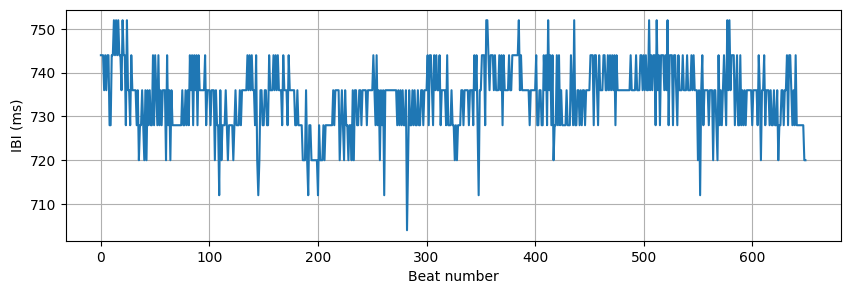

In [235]:
# Calculate the inter-beat intervals (IBI)
ppi = np.diff(peaks)*ts*1000 # in milliseconds

# Example: select the beats with IBI between 600 and 800 ms
# Uncomment and modify, if needed
# >, > are used to discard errors in testing --> values that are not possible like heart being stopped for over 4 seconds
i = (ppi > 700) & (ppi < 780)
ppi = ppi[i]

# Example: select the beats from 10 to 310. 
# Uncomment  and modify, if needed
# ppi = ppi[10:310]

# Plot the IBI
plt.figure(figsize = (10, 3))
plt.plot(ppi)
plt.xlabel('Beat number')
plt.ylabel('IBI (ms)')
plt.grid()
plt.show()

In [236]:
# Calculate the average IBI
mean_ppi = np.mean(ppi)
print(f'Mean IBI: {mean_ppi:.2f} ms')

# Calculate the heart rate
hr = 60000/mean_ppi
print(f'Heart rate: {hr:.2f} bpm')

Mean IBI: 734.30 ms
Heart rate: 81.71 bpm


In [237]:
x = ppi

# Some numpy functions
x_sqrt = np.sqrt(x) # Square root
x_2 = x**2 # Square
x_diff = np.diff(x) # Difference
x_mean = np.mean(x) # Mean
x_std = np.std(x) # Standard deviation
x_rmssd = np.sqrt(np.mean(np.diff(x)**2)) # Root mean square of successive differences

# Print the results
#print(f'Original: {x}')
#print('Square roots:', [np.round(val,2) for val in x_sqrt])
#print(f'Squares: {x_2}')
#print(f'Differences: {x_diff}')
print(f'Mean: {x_mean:.2f}')
print(f'SDNN: {x_std:.2f}')
print(f'RMSSD: {x_rmssd:.2f}')

Mean: 734.30
SDNN: 7.59
RMSSD: 9.43
